In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import csv

In [ ]:
data_path = "/content/drive/MyDrive/datasets_LM/fine-tune/raw/COVID19-desinformation/corpus.csv"
df = pd.read_csv(data_path)
df.head()

,Conteudo,Rotulo
0,Secretário de Saúde em MT é internado na UTI e...,1
1,Em meio às dificuldades trazidas pelo novo cor...,1
2,"Já que é necessário ficar em casa, fique com t...",1
3,"Agora a pouco, o @SenadoFederal aprovou o proj...",1
4,Novo boletim e Espírito Santo tem 84 casos con...,1


In [ ]:
df.shape

(14012, 2)

In [ ]:
df['Rotulo'] = df['Rotulo'].apply(lambda x: str(x).replace("1.0","1"))
df['Rotulo'] = df['Rotulo'].apply(lambda x: str(x).replace("0.0","0"))
df['Rotulo'] = df['Rotulo'].apply(lambda x: str(x).replace("2.0","2"))
filtrado = df.loc[df['Rotulo']!='0']
filtrado = filtrado.loc[df['Conteudo']!='1']

In [ ]:
filtrado.shape

(12027, 2)

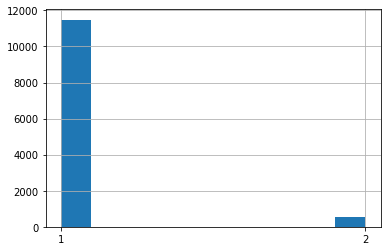

In [ ]:
filtrado["Rotulo"].hist()

In [ ]:
X_train, X_test = train_test_split(filtrado, test_size=0.2, random_state=0) 

In [ ]:
X_train.shape, X_test.shape

((9621, 2), (2406, 2))

In [ ]:
filtrado["Rotulo"].value_counts() 

1    11484
2      543
Name: Rotulo, dtype: int64

In [ ]:
filtrado["Rotulo"].value_counts() / filtrado.shape[0]

1    0.954852
2    0.045148
Name: Rotulo, dtype: float64

In [ ]:
X_train["Rotulo"].value_counts()

1    9181
2     440
Name: Rotulo, dtype: int64

In [ ]:
X_train["Rotulo"].value_counts() / X_train.shape[0]

1    0.954267
2    0.045733
Name: Rotulo, dtype: float64

In [ ]:
X_test["Rotulo"].value_counts()

1    2303
2     103
Name: Rotulo, dtype: int64

In [ ]:
X_test["Rotulo"].value_counts() / X_train.shape[0]

1    0.239372
2    0.010706
Name: Rotulo, dtype: float64

In [ ]:
X_train.to_csv("train.csv", index=False, header=["text", "label"])
X_test.to_csv("test.csv", index=False, header=["text", "label"])

In [ ]:
! pip3 install datasets

In [ ]:
! huggingface-cli login

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Emanuel/covid19-desinformation", use_auth_token=True)

In [45]:
dataset["train"], dataset["test"]

(Dataset({
     features: ['text', 'label'],
     num_rows: 9621
 }), Dataset({
     features: ['text', 'label'],
     num_rows: 2406
 }))